In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diadf=pd.read_csv("diabetes.csv")
diadf.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1


In [89]:
#settings to display all columns
pd.set_option("display.max_columns",None)
diadf.head(20)
#There are 9 columns 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [91]:
diadf.info()
#There are 9 columns and 2000 rows, none of the rows shows any missing value, BMI and DiabetesPedigreeFunction have decimal values while rest have all whole number integer values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [92]:
diadf.shape
#2000 rows and 9 columns

(2000, 9)

In [93]:
diadf.describe()
#gives statistical summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [94]:
diadf.isnull().sum()
#to confirm no null values in any column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
#filling of missing data of normalized losses with the average of the remaining
df_temp=diadf[diadf['BloodPressure']!='0']
avg1=df_temp['BloodPressure'].astype(float).mean()
diadf['BloodPressure']=diadf['BloodPressure'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['Glucose']!='0']
avg1=df_temp['Glucose'].astype(float).mean()
diadf['Glucose']=diadf['Glucose'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['SkinThickness']!='0']
avg1=df_temp['SkinThickness'].astype(float).mean()
diadf['SkinThickness']=diadf['SkinThickness'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['Insulin']!='0']
avg1=df_temp['Insulin'].astype(float).mean()
diadf['Insulin']=diadf['Insulin'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['BMI']!='0']
avg1=df_temp['BMI'].astype(float).mean()
diadf['BMI']=diadf['BMI'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['DiabetesPedigreeFunction']!='0']
avg1=df_temp['DiabetesPedigreeFunction'].astype(float).mean()
diadf['DiabetesPedigreeFunction']=diadf['DiabetesPedigreeFunction'].replace(0,avg1).astype(float)

df_temp=diadf[diadf['Age']!='0']
avg1=df_temp['Age'].astype(float).mean()
diadf['Age']=diadf['Age'].replace(0,avg1).astype(float)

diadf.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.000,80.254,33.600,0.127,47.0,1
1,0,84.0,82.0000,31.000,125.000,38.200,0.233,23.0,0
2,0,145.0,69.1455,20.935,80.254,44.200,0.630,31.0,1
3,0,135.0,68.0000,42.000,250.000,42.300,0.365,24.0,1
4,1,139.0,62.0000,41.000,480.000,40.700,0.536,21.0,0
5,0,173.0,78.0000,32.000,265.000,46.500,1.159,58.0,0
6,4,99.0,72.0000,17.000,80.254,25.600,0.294,28.0,0
7,8,194.0,80.0000,20.935,80.254,26.100,0.551,67.0,0
8,2,83.0,65.0000,28.000,66.000,36.800,0.629,24.0,0
9,2,89.0,90.0000,30.000,80.254,33.500,0.292,42.0,0


Pregnancies
0.9816286665825157


<Figure size 432x288 with 0 Axes>

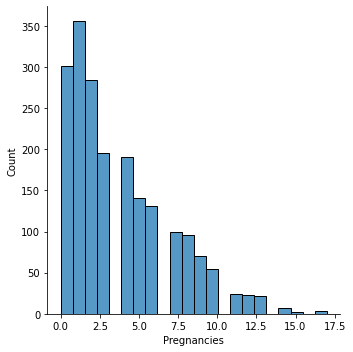

Glucose
0.5130918962916631


<Figure size 432x288 with 0 Axes>

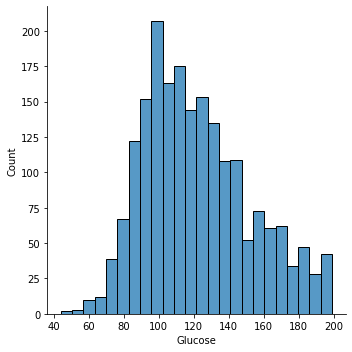

BloodPressure
0.24972154851760814


<Figure size 432x288 with 0 Axes>

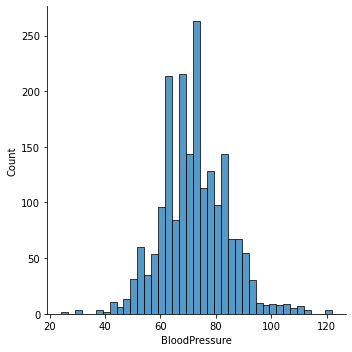

SkinThickness
1.5753355567434364


<Figure size 432x288 with 0 Axes>

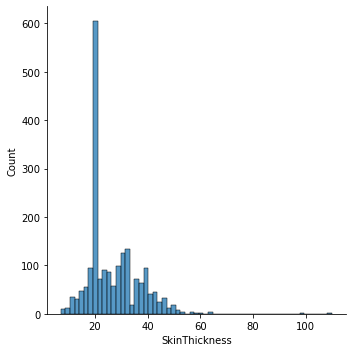

Insulin
2.9464409272033265


<Figure size 432x288 with 0 Axes>

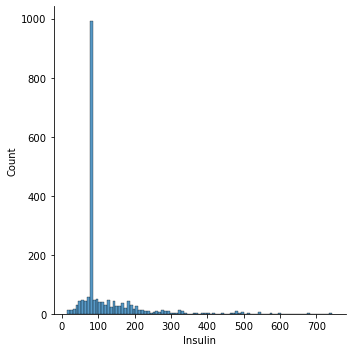

BMI
0.9374923720067809


<Figure size 432x288 with 0 Axes>

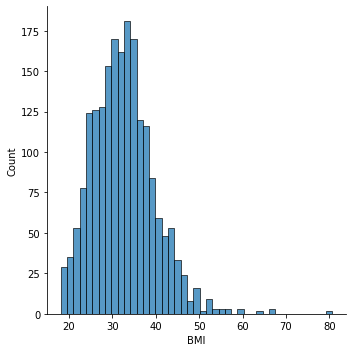

DiabetesPedigreeFunction
1.8106196267530008


<Figure size 432x288 with 0 Axes>

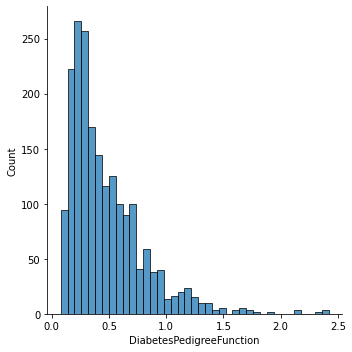

Age
1.180381087900115


<Figure size 432x288 with 0 Axes>

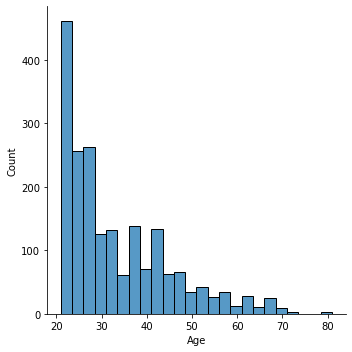

Outcome
0.6661332052171766


<Figure size 432x288 with 0 Axes>

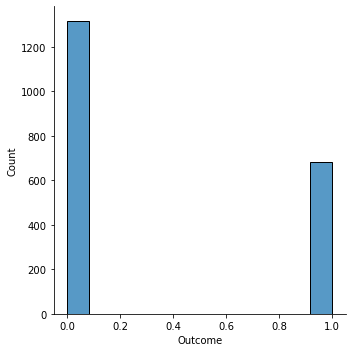

In [96]:
from scipy.stats import skew
for col in diadf:
    print(col)
    print(skew(diadf[col]))
    plt.figure()
    sns.displot(diadf[col])
    plt.show()

In [98]:
zero_not_accpeted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for x in zero_not_accpeted:
    diadf['x']=diadf['x'].replace(0,np.NaN)
    mean=int(df['x'].mean(skipna=True))
    diadf['x']=diadf['x'].replace(np.NaN,mean)
diadf['Glucose']


KeyError: 'x'

In [99]:
diadf['Pregnancies'].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14],
      dtype=int64)

In [100]:
diadf['BloodPressure'].unique()

array([ 62.    ,  82.    ,  69.1455,  68.    ,  78.    ,  72.    ,
        80.    ,  65.    ,  90.    ,  70.    ,  74.    ,  64.    ,
        60.    ,  50.    ,  54.    ,  76.    ,  84.    ,  92.    ,
       110.    ,  66.    ,  56.    ,  88.    ,  58.    ,  85.    ,
        86.    ,  75.    ,  48.    ,  44.    , 108.    ,  55.    ,
        96.    , 122.    ,  30.    ,  52.    ,  98.    , 104.    ,
        95.    ,  46.    , 102.    , 100.    ,  61.    ,  94.    ,
        24.    ,  38.    , 106.    , 114.    ,  40.    ])

In [102]:
diadf['Age'].unique()

array([47., 23., 31., 24., 21., 58., 28., 67., 42., 33., 45., 22., 66.,
       30., 25., 55., 39., 41., 40., 38., 35., 64., 46., 27., 56., 26.,
       37., 48., 54., 29., 44., 36., 32., 43., 34., 60., 61., 69., 62.,
       65., 57., 52., 51., 49., 63., 59., 72., 81., 50., 53., 70., 68.])

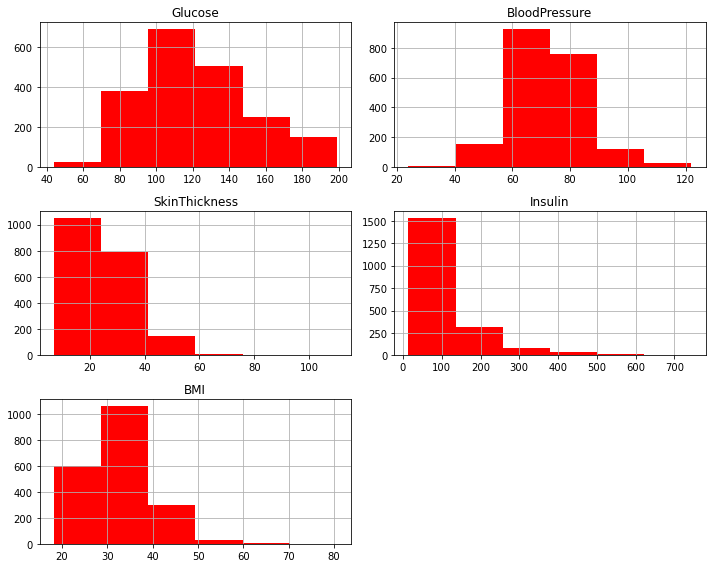

In [105]:
#Univariate analysis
diadf[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(10,8),bins=6,color='r')
#2plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

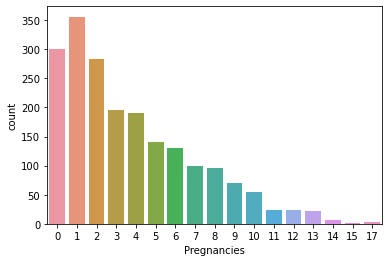

In [107]:
sns.countplot(x='Pregnancies',data=diadf)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

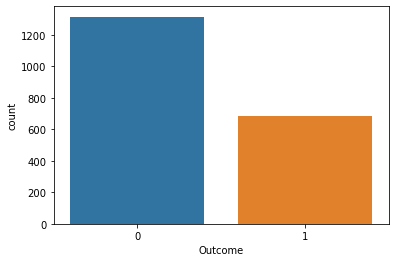

In [109]:
sns.countplot(x='Outcome',data=diadf)

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0               1316     1316           1316           1316     1316  1316   
1                684      684            684            684      684   684   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                            1316  1316  
1                             684   684  


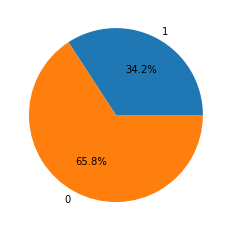

In [111]:
x=diadf.groupby('Outcome').agg('count')
print(x)
labels=x.Pregnancies.sort_values().index
counts=x.Pregnancies.sort_values()
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [117]:
diadf["BMI"]=np.sqrt(diadf["BMI"])
skew(diadf["BMI"])

0.4593947162349431

In [124]:
diadf["SkinThickness"]=np.sqrt(diadf["SkinThickness"])
skew(diadf["SkinThickness"])

0.6630192152693395

In [135]:
diadf["Insulin"]=np.sqrt(diadf["Insulin"])
skew(diadf["Insulin"])

1.3571901516925988

In [136]:
diadf["BloodPressure"]=np.sqrt(diadf["BloodPressure"])
skew(diadf["BloodPressure"])

-0.5677519355176293

In [137]:
diadf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,1.294269,5.916080,2.993069,5.796551,0.127,47.0,1
1,0,84.0,1.317084,5.567764,3.343702,6.180615,0.233,23.0,0
2,0,145.0,1.303123,4.575478,2.993069,6.648308,0.630,31.0,1
3,0,135.0,1.301763,6.480741,3.976354,6.503845,0.365,24.0,1
4,1,139.0,1.294269,6.403124,4.680695,6.379655,0.536,21.0,0


In [132]:
diadf.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121569,0.203647,0.045029,-0.012411,0.022764,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.198018,0.177025,0.406178,0.235926,0.124176,0.259853,0.487977
BloodPressure,0.203647,0.198018,1.000000,0.159634,0.017871,0.245349,0.015308,0.325170,0.170042
SkinThickness,0.045029,0.177025,0.159634,1.000000,0.270557,0.541929,0.132404,0.045679,0.180234
Insulin,-0.012411,0.406178,0.017871,0.270557,1.000000,0.235391,0.155621,0.006997,0.189826
BMI,0.022764,0.235926,0.245349,0.541929,0.235391,1.000000,0.141232,0.024112,0.292007
DiabetesPedigreeFunction,-0.025453,0.124176,0.015308,0.132404,0.155621,0.141232,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325170,0.045679,0.006997,0.024112,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.170042,0.180234,0.189826,0.292007,0.155459,0.236509,1.000000


<AxesSubplot:>

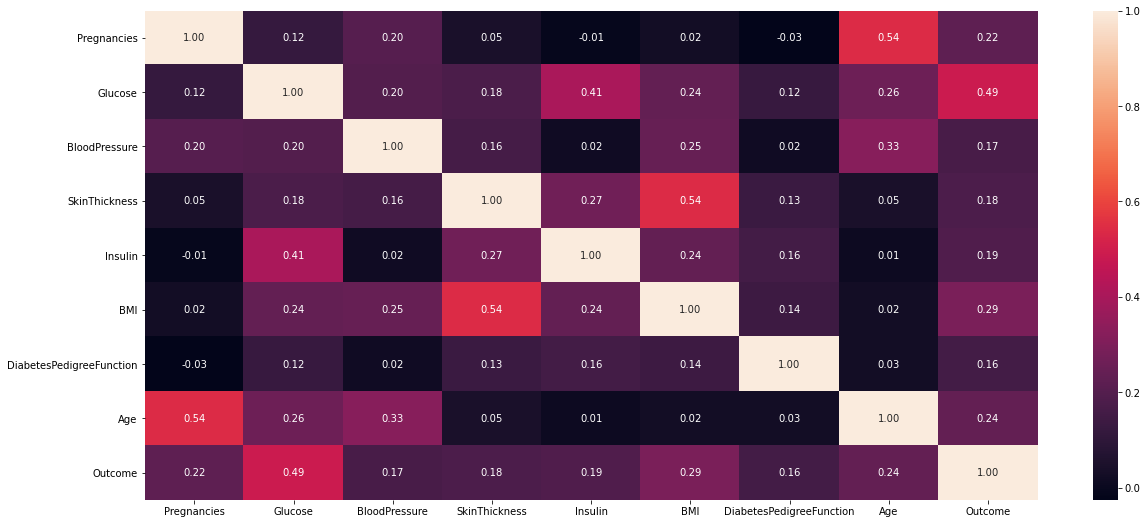

In [134]:
corr = diadf.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, fmt='.2f')